# Analysis of *Kiki’s Delivery Service*

In [1]:
import numpy as np
import pandas as pd

# Image processing
import glob
import cv2

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Set font as Arial
plt.rcParams['font.family'] = 'Arial'

In [2]:
# Paths to images
image_paths = glob.glob("data/formal_analysis/*.png")

In [3]:
# Lists for storing RGB values for clip_1 images
clip1_values = {
    "r": [],
    "g": [],
    "b": [],
    "s": [],
    "v": []
}

# Lists for storing RGB values for clip_2 images
clip2_values = {
    "r": [],
    "g": [],
    "b": [],
    "s": [],
    "v": []
}

# Read each image and distribute RGB values into the appropriate lists
for img_path in image_paths:
    img = cv2.imread(img_path)  # OpenCV reads in BGR format
    if img is None:
        # If the image fails to load, skip it
        continue
    
    # Split into B, G, R channels
    b_channel, g_channel, r_channel = cv2.split(img)

    # Flatten each channel to a 1D array
    b_vals = b_channel.flatten()
    g_vals = g_channel.flatten()
    r_vals = r_channel.flatten()

    # Convert to HSV to get saturation
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv2.split(hsv)
    s_vals = s_channel.flatten()
    v_vals = v_channel.flatten()
    
    # Check whether this image belongs to clip_1 or clip_2
    if "clip_1" in img_path:
        clip1_values["b"].extend(b_vals)
        clip1_values["g"].extend(g_vals)
        clip1_values["r"].extend(r_vals)
        clip1_values["s"].extend(s_vals)
        clip1_values["v"].extend(v_vals)
    elif "clip_2" in img_path:
        clip2_values["b"].extend(b_vals)
        clip2_values["g"].extend(g_vals)
        clip2_values["r"].extend(r_vals)
        clip2_values["s"].extend(s_vals)
        clip2_values["v"].extend(v_vals)

# Convert lists to numpy arrays for convenience (optional)
clip1_values = {key: np.array(value) for key, value in clip1_values.items()}
clip2_values = {key: np.array(value) for key, value in clip2_values.items()}

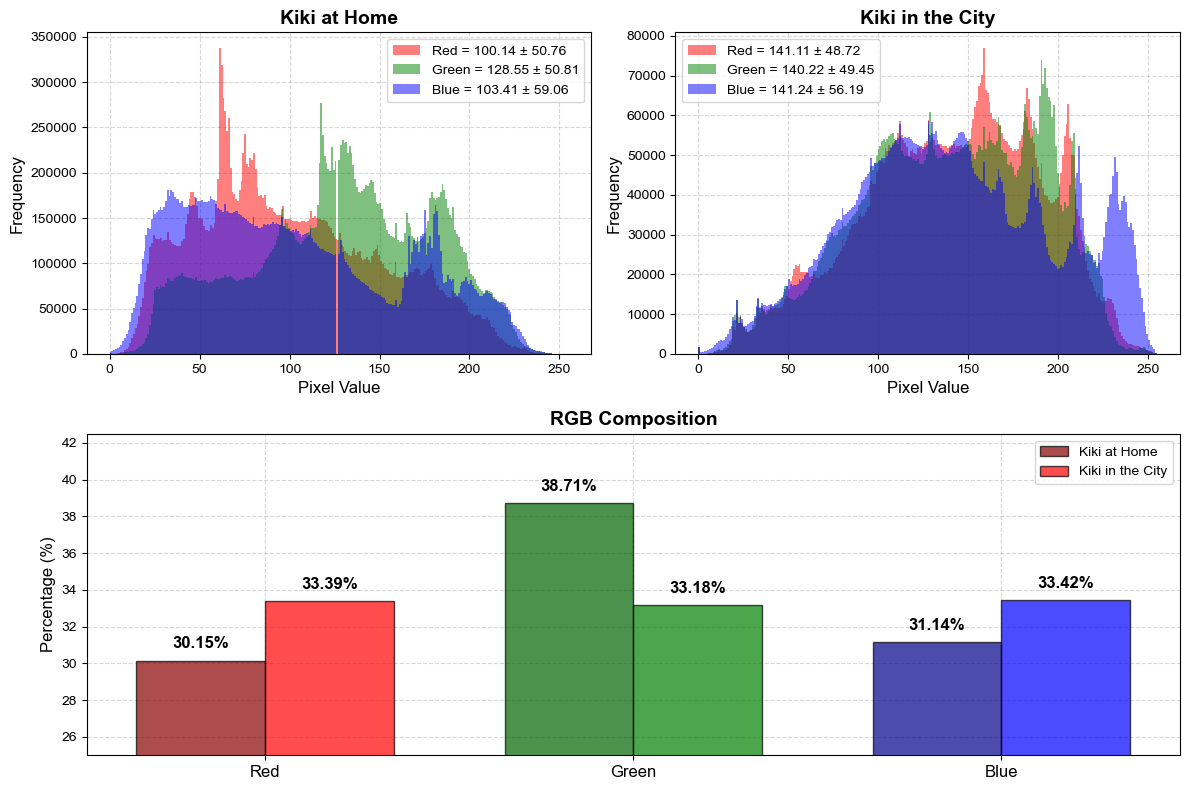

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Compute mean and SD
clip_1_mean = {key: np.mean(value) for key, value in clip1_values.items()}
clip_1_std = {key: np.std(value) for key, value in clip1_values.items()}
clip_2_mean = {key: np.mean(value) for key, value in clip2_values.items()}
clip_2_std = {key: np.std(value) for key, value in clip2_values.items()}

# Compute total pixel values for normalization
clip_1_total = sum([sum(clip1_values[key]) for key in clip1_values if key in ["r", "g", "b"]])
clip_2_total = sum([sum(clip2_values[key]) for key in clip2_values if key in ["r", "g", "b"]])

# Compute percentage of each color channel
clip_1_percent = {key: (sum(clip1_values[key]) / clip_1_total) * 100 for key in clip1_values if key in ["r", "g", "b"]}
clip_2_percent = {key: (sum(clip2_values[key]) / clip_2_total) * 100 for key in clip2_values if key in ["r", "g", "b"]}

# Get labels
labels = ["r", "g", "b"]
channel_labels = {"r": "Red", "g": "Green", "b": "Blue"}
clip_1_labels = {label: f"{channel_labels[label]} = {clip_1_mean[label]:.2f} ± {clip_1_std[label]:.2f}" for label in labels}
clip_2_labels = {label: f"{channel_labels[label]} = {clip_2_mean[label]:.2f} ± {clip_2_std[label]:.2f}" for label in labels}

# Create figure with 2-row layout
fig = plt.figure(figsize=(12, 8))

# Create subplots for histograms
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Left histogram
ax2 = plt.subplot2grid((2, 2), (0, 1))  # Right histogram
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)  # Bar plot spanning both columns

# Clip_1 histogram
ax1.hist(clip1_values["r"], bins=256, color='red', alpha=0.5, label=clip_1_labels["r"], zorder=3)
ax1.hist(clip1_values["g"], bins=256, color='green', alpha=0.5, label=clip_1_labels["g"], zorder=3)
ax1.hist(clip1_values["b"], bins=256, color='blue', alpha=0.5, label=clip_1_labels["b"], zorder=3)
ax1.set_title("Kiki at Home", fontsize=14, fontweight='bold')
ax1.set_xlabel("Pixel Value", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.5, linestyle='--', zorder=0)

# Clip_2 histogram
ax2.hist(clip2_values["r"], bins=256, color='red', alpha=0.5, label=clip_2_labels["r"], zorder=3)
ax2.hist(clip2_values["g"], bins=256, color='green', alpha=0.5, label=clip_2_labels["g"], zorder=3)
ax2.hist(clip2_values["b"], bins=256, color='blue', alpha=0.5, label=clip_2_labels["b"], zorder=3)
ax2.set_title("Kiki in the City", fontsize=14, fontweight='bold')
ax2.set_xlabel("Pixel Value", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.5, linestyle='--', zorder=0)

# Bar plot for color percentages (spanning both columns)
bar_width = 0.35
x = np.arange(len(labels))

# Plot bars
ax3.bar(x - bar_width / 2, [clip_1_percent[label] for label in labels], bar_width,
        color=['darkred', 'darkgreen', 'darkblue'], edgecolor='black', alpha=0.7, label="Kiki at Home", zorder=3)
ax3.bar(x + bar_width / 2, [clip_2_percent[label] for label in labels], bar_width,
        color=['red', 'green', 'blue'], edgecolor='black', alpha=0.7, label="Kiki in the City", zorder=3)

# Labels and title
ax3.set_xticks(x)
ax3.set_xticklabels([channel_labels[label] for label in labels], fontsize=12)
ax3.set_ylabel("Percentage (%)", fontsize=12)
ax3.set_title("RGB Composition", fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.5, linestyle='--', zorder=0)

# Add text labels to the bars
for i, label in enumerate(labels):
    ax3.text(i - bar_width / 2, clip_1_percent[label] + 0.5, f"{clip_1_percent[label]:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', zorder=4)
    ax3.text(i + bar_width / 2, clip_2_percent[label] + 0.5, f"{clip_2_percent[label]:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', zorder=4)

# Set y-limits from 20-40
ax3.set_ylim(25, 42.5)

# Adjust layout
plt.tight_layout()
plt.savefig("results/formal_analysis/kiki_rgb_histograms.png", dpi=600, bbox_inches='tight')
plt.savefig("results/formal_analysis/kiki_rgb_histograms.svg", bbox_inches='tight')
plt.show()

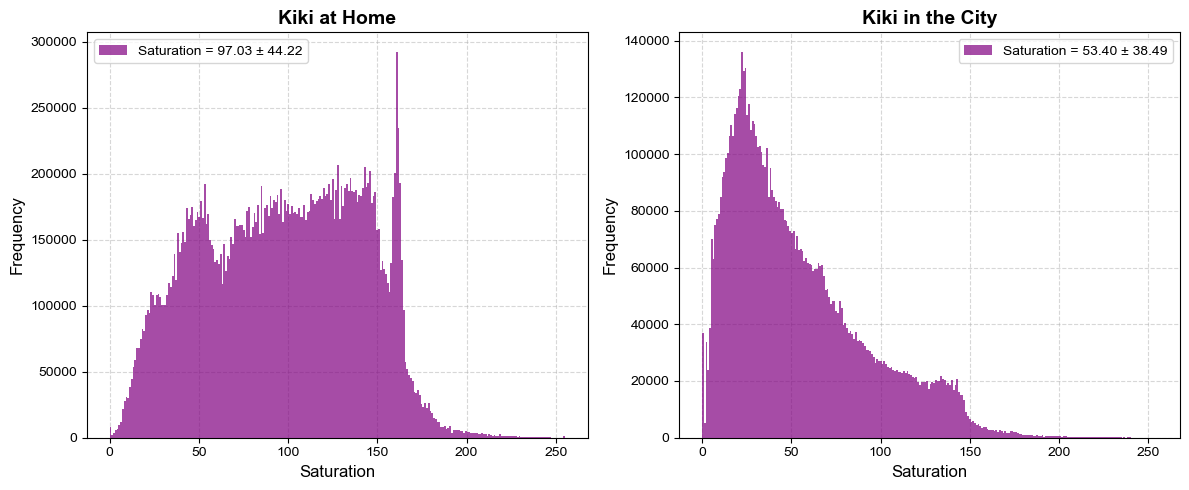

In [36]:
clip1_s_label = f"Saturation = {clip_1_mean['s']:.2f} ± {clip_1_std['s']:.2f}"
clip2_s_label = f"Saturation = {clip_2_mean['s']:.2f} ± {clip_2_std['s']:.2f}"

# Create figure for saturation
plt.figure(figsize=(12, 5))

# Clip_1 saturation subplot
plt.subplot(1, 2, 1)
plt.hist(clip1_values["s"], bins=256, color='purple', alpha=0.7, label=clip1_s_label, zorder=3)
plt.title("Kiki at Home", fontsize=14, fontweight='bold')
plt.xlabel("Saturation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--', zorder=0)

# Clip_2 saturation subplot
plt.subplot(1, 2, 2)
plt.hist(clip2_values["s"], bins=256, color='purple', alpha=0.7, label=clip2_s_label, zorder=3)
plt.title("Kiki in the City", fontsize=14, fontweight='bold')
plt.xlabel("Saturation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--', zorder=0)

plt.tight_layout()
plt.savefig("results/formal_analysis/kiki_saturation_histograms.png", dpi=600, bbox_inches='tight')
plt.savefig("results/formal_analysis/kiki_saturation_histograms.svg", bbox_inches='tight')
plt.show()

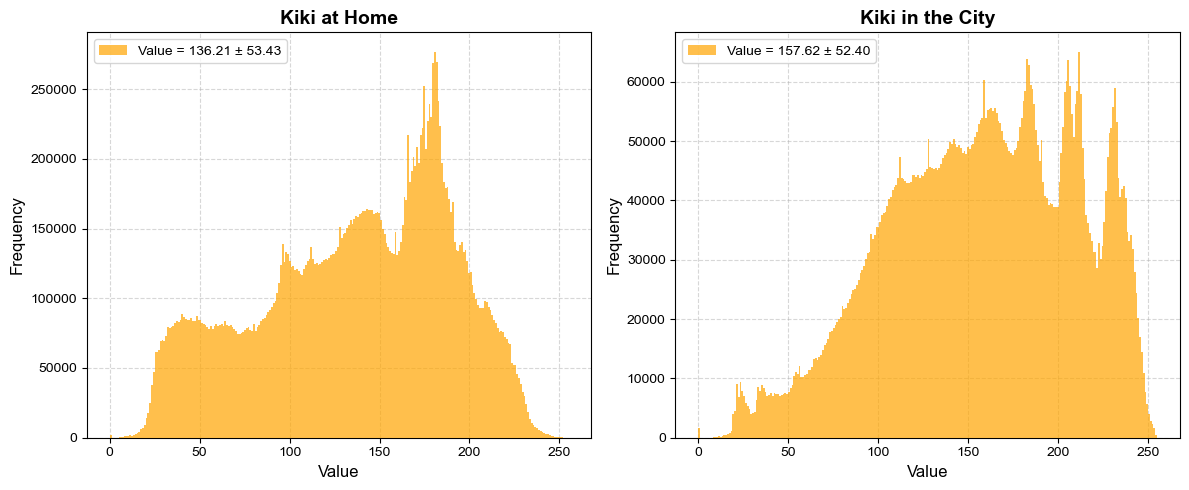

In [35]:
clip1_v_label = f"Value = {clip_1_mean['v']:.2f} ± {clip_1_std['v']:.2f}"
clip2_v_label = f"Value = {clip_2_mean['v']:.2f} ± {clip_2_std['v']:.2f}"

# Create figure for value
plt.figure(figsize=(12, 5))

# Clip_1 value subplot
plt.subplot(1, 2, 1)
plt.hist(clip1_values["v"], bins=256, color='orange', alpha=0.7, label=clip1_v_label, zorder=3)
plt.title("Kiki at Home", fontsize=14, fontweight='bold')
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--', zorder=0)

# Clip_2 value subplot
plt.subplot(1, 2, 2)
plt.hist(clip2_values["v"], bins=256, color='orange', alpha=0.7, label=clip2_v_label, zorder=3)
plt.title("Kiki in the City", fontsize=14, fontweight='bold')
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--', zorder=0)

plt.tight_layout()
plt.savefig("results/formal_analysis/kiki_value_histograms.png", dpi=600, bbox_inches='tight')
plt.savefig("results/formal_analysis/kiki_value_histograms.svg", bbox_inches='tight')
plt.show()

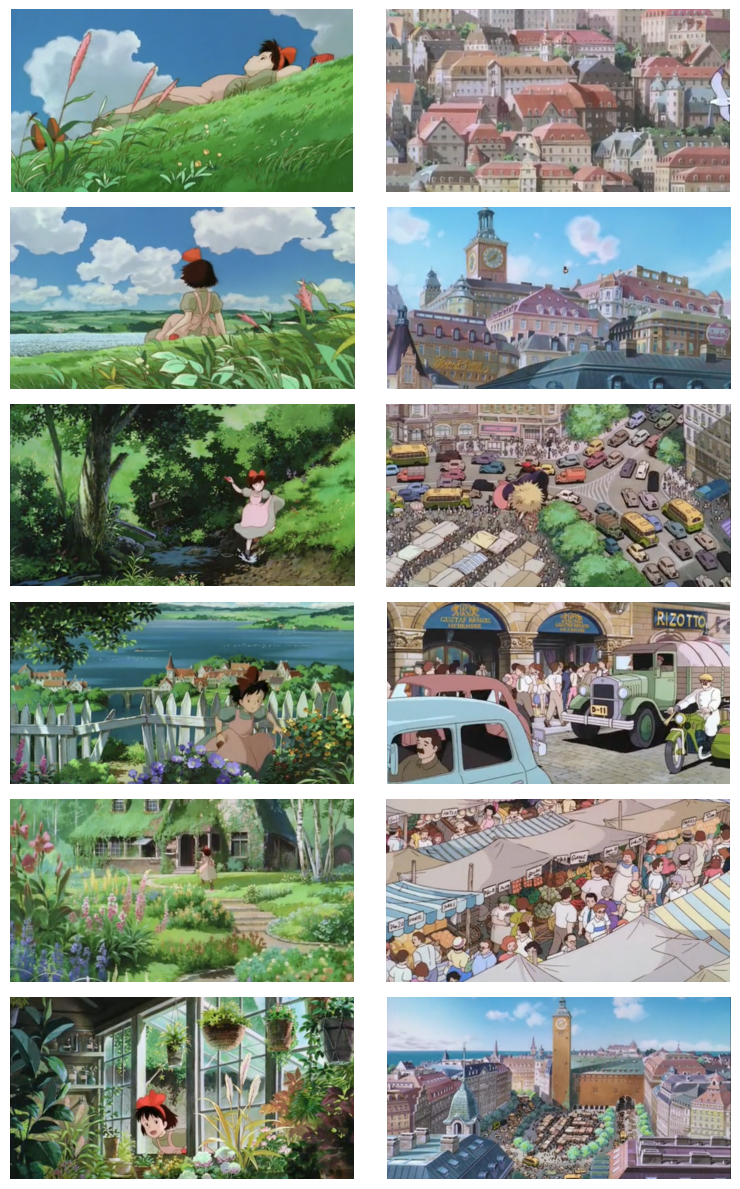

In [8]:
# Gather paths to each clip separately, sorted by filename
clip1_paths = glob.glob("data/formal_analysis/*clip_1*.png")
clip2_paths = glob.glob("data/formal_analysis/*clip_2*.png")
clip1_paths.sort()
clip2_paths.sort()

# Determine how many images we have in each clip
num_clip1 = len(clip1_paths)
num_clip2 = len(clip2_paths)

# Plot pairs only up to the smaller of the two counts
num_images = min(num_clip1, num_clip2)

# Create a figure with `num_images` rows × 2 columns
fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(8, 2 * num_images))

# Loop over all matched pairs
for i in range(num_images):
    # Read images (BGR)
    img1_bgr = cv2.imread(clip1_paths[i])
    img2_bgr = cv2.imread(clip2_paths[i])
    
    # Convert to RGB for matplotlib
    img1_rgb = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
    
    # Left column: clip_1 image
    axs[i, 0].imshow(img1_rgb)
    # axs[i, 0].set_title(f"Clip_1 - Image {i+1}")
    axs[i, 0].axis("off")
    
    # Right column: clip_2 image
    axs[i, 1].imshow(img2_rgb)
    # axs[i, 1].set_title(f"Clip_2 - Image {i+1}")
    axs[i, 1].axis("off")

plt.tight_layout()
plt.savefig("results/formal_analysis/kiki_image_pairs.png", dpi=600, bbox_inches='tight')
plt.show()


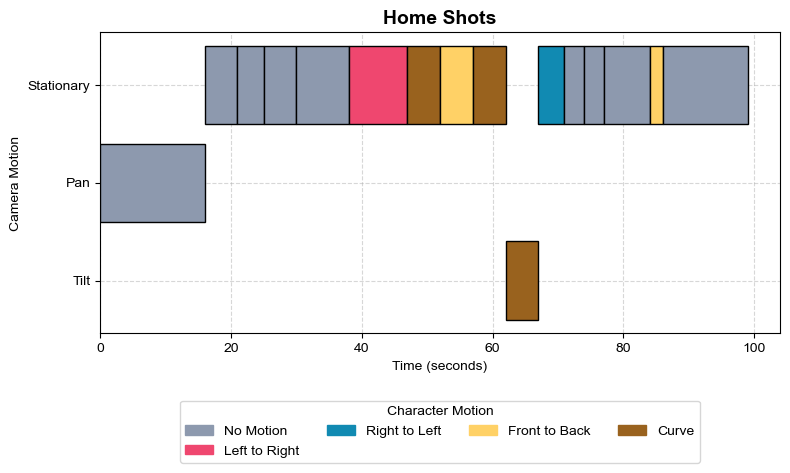

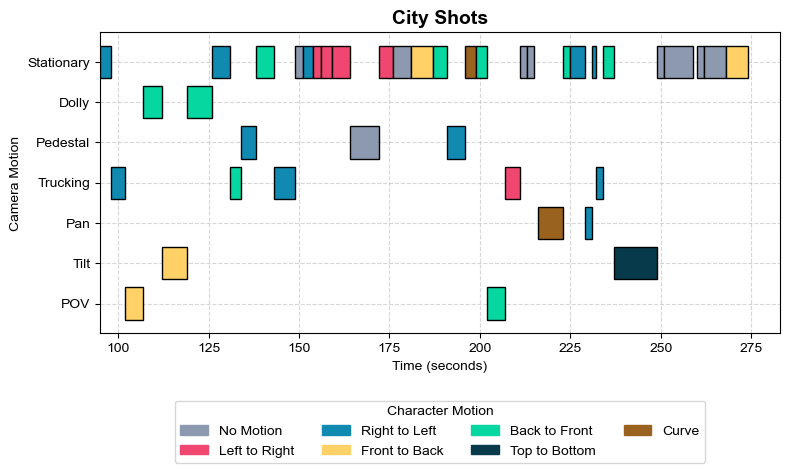

In [34]:
# Example data as a list of dicts. You could also load this from a CSV, etc.
motion_analysis = pd.read_csv("data/formal_analysis/motion_analysis.csv")

# Create the DataFrame
df = pd.DataFrame(motion_analysis)

# Function to convert mm:ss to total seconds
def time_to_seconds(timestr):
    minutes, seconds = timestr.split(':')
    return int(minutes)*60 + int(seconds)

# Create numeric start/end columns in seconds
df['start_sec'] = df['Shot Start'].apply(time_to_seconds)
df['end_sec']   = df['Shot End'].apply(time_to_seconds)

# Replace NaN with 'No motion'
df['Character Motion'] = df['Character Motion'].fillna('No Motion')
df['Camera Motion'] = df['Camera Motion'].fillna('Stationary')

# We will plot one figure for Home, one for City
classifications = ["Home", "City"]

# Optionally define a color map for character motions
# You can add/adjust as needed
color_map = {
    'No Motion': '#8d99ae',
    'Left to Right': '#ef476f',
    'Right to Left': '#118ab2',
    'Front to Back': '#ffd166',
    'Back to Front': '#06d6a0',
    'Top to Bottom': '#073b4c',
    'Curve': '#99621E'
}

for shot_class in classifications:
    # Filter the DataFrame by classification
    sub_df = df[df["Shot Classification"] == shot_class].copy()
    
    # Identify all unique camera motions in this subset
    # We'll place them on discrete y-levels
    # unique_cam_motions = list(sub_df["Camera Motion"].unique())

    # Define a custom order for y-axis (Camera Motions)
    custom_y_order = ["Stationary", "Dolly", "Pedestal", "Trucking", "Pan", "Tilt", "POV"]
    custom_y_order.reverse()

    # Filter and retain only the camera motions that exist in sub_df, preserving order
    unique_cam_motions = [motion for motion in custom_y_order if motion in sub_df["Camera Motion"].unique()]
    
    # Create a dict mapping camera motion -> y index
    motion_to_y = {m: i for i, m in enumerate(unique_cam_motions)}
    
    # Create the figure
    plt.figure(figsize=(8, 5))
    
    # Plot each row as a horizontal bar
    for _, row in sub_df.iterrows():
        y_val = motion_to_y[row["Camera Motion"]]
        start = row['start_sec']
        end   = row['end_sec']
        width = end - start
        
        # Lookup the character motion color (default to 'black' if missing)
        bar_color = color_map.get(row["Character Motion"], 'black')
        
        plt.barh(
            y=y_val,
            width=width,
            left=start,
            color=bar_color,
            edgecolor='black',
            zorder=3
        )
    
    # Configure the y-axis ticks/labels
    plt.yticks(range(len(unique_cam_motions)), unique_cam_motions)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Camera Motion")
    plt.title(f"{shot_class} Shots", fontsize=14, fontweight='bold')
    
    # Optionally create a legend for character motions
    # We'll gather unique character motions from sub_df
    unique_chars = sub_df['Character Motion'].unique()

    desired_order = [
        'No Motion', 'Left to Right', 'Right to Left', 
        'Front to Back', 'Back to Front', 'Top to Bottom', 'Curve'
    ]
    unique_chars = [ch for ch in desired_order if ch in sub_df['Character Motion'].unique()]

    # Create patches for the legend
    from matplotlib.patches import Patch
    legend_patches = [
        Patch(color=color_map.get(ch, 'black'), label=ch)
        for ch in unique_chars
    ]
    plt.legend(handles=legend_patches, title="Character Motion", bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

    plt.grid(True, alpha=0.5, linestyle='--', zorder=0)
    
    plt.tight_layout()
    plt.savefig(f"results/formal_analysis/kiki_{shot_class.lower()}_motion_analysis.png", dpi=600, bbox_inches='tight')
    plt.savefig(f"results/formal_analysis/kiki_{shot_class.lower()}_motion_analysis.svg", bbox_inches='tight')
    plt.show()


In [40]:
# Compute the shot length
df['shot_length'] = df['end_sec'] - df['start_sec']

# Compute the average shot length for each classification
avg_shot_length = df.groupby('Shot Classification')['shot_length'].mean()
avg_shot_length_sd = df.groupby('Shot Classification')['shot_length'].std()

# Print the results
print("Average Shot Length (seconds) and Standard Deviation:")
print(avg_shot_length)
print(avg_shot_length_sd)

Average Shot Length (seconds) and Standard Deviation:
Shot Classification
City    4.317073
Home    6.187500
Name: shot_length, dtype: float64
Shot Classification
City    2.207250
Home    3.745553
Name: shot_length, dtype: float64


In [44]:
for shot_class in classifications:
    print("Total shots in", shot_class, ":", len(df[df['Shot Classification'] == shot_class]))
    print("\n")

    for motion_type in ['Character Motion', 'Camera Motion']:
        motion_counts = df[df['Shot Classification'] == shot_class].value_counts(motion_type)
        print(f"{motion_type} counts for {shot_class}:")
        print(motion_counts)
        print("\n")


Total shots in Home : 16


Character Motion counts for Home:
Character Motion
No Motion        9
Curve            3
Front to Back    2
Left to Right    1
Right to Left    1
Name: count, dtype: int64


Camera Motion counts for Home:
Camera Motion
Stationary    14
Pan            1
Tilt           1
Name: count, dtype: int64


Total shots in City : 41


Character Motion counts for City:
Character Motion
Right to Left    11
Back to Front     9
No Motion         9
Left to Right     5
Front to Back     4
Curve             2
Top to Bottom     1
Name: count, dtype: int64


Camera Motion counts for City:
Camera Motion
Stationary    25
Trucking       5
Pedestal       3
Dolly          2
POV            2
Pan            2
Tilt           2
Name: count, dtype: int64


